In [ ]:
!pip install textdata

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import textdata as td
import pandas as pd
import string
import nltk.corpus
from nltk.corpus import stopwords
import nltk
import re
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation, NMF
import matplotlib.pyplot as plt
import matplotlib


In [ ]:
pip install dataframe-image

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 6.6 MB 5.4 MB/s 


In [ ]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
hasoc = pd.read_csv('/content/hasoc-train.csv')
olid_test = pd.read_csv('/content/olid-test.csv')
olid_train = pd.read_csv('/content/olid-train-small.csv')

In [ ]:
olid_test.head()

,id,text,labels
0,15923,#WhoIsQ #WheresTheServer #DumpNike #DECLASFISA...,1
1,27014,"#ConstitutionDay is revered by Conservatives, ...",0
2,30530,#FOXNews #NRA #MAGA #POTUS #TRUMP #2ndAmendmen...,0
3,13876,#Watching #Boomer getting the news that she is...,0
4,60133,#NoPasaran: Unity demo to oppose the far-right...,1


In [ ]:
hasoc.head()

,id,text,labels
0,hasoc_en_1,#DhoniKeepsTheGlove | WATCH: Sports Minister K...,0
1,hasoc_en_2,@politico No. We should remember very clearly ...,1
2,hasoc_en_3,@cricketworldcup Guess who would be the winner...,0
3,hasoc_en_4,Corbyn is too politically intellectual for #Bo...,0
4,hasoc_en_5,All the best to #TeamIndia for another swimmin...,0


In [ ]:
olid_train.head()

,id,text,labels
0,24590,@USER @USER @USER @USER @USER Hahah a left tel...,0
1,19287,@USER @USER I’m glad you do babe (I kiss you b...,0
2,44676,@USER And I have concerns with”Democrats”,0
3,96110,@USER AS IT SHOULD BE!,0
4,51557,@USER @USER A horrendous act of course. Conser...,1


In [ ]:
stopwords = set(stopwords.words("english"))

In [ ]:
def remove_stopwords(text):
    filtered_words = [word.lower() for word in text.split() if word.lower() not in stopwords]
    return " ".join(filtered_words)

# removing numbers and punctuations

def preprocess(text):
    text_input = re.sub(r'!', ' ', str(text))
    text_input = re.sub(r'[0-9]+', '', str(text_input))
    text_input = text_input.replace('<br /><br />', '')
    text_input = text_input.replace('(', '')
    text_input = text_input.replace('"', '')
    text_input = text_input.replace('$', '')
    text_input = text_input.replace('*', '')
    text_input = text_input.replace('.', '')
    text_input = text_input.replace('/', '')
    text_input = text_input.replace(':', '')
    text_input = text_input.replace('?', '')
    text_input = text_input.replace(',', '')
    text_input = text_input.replace('---', '')
    text_input = text_input.replace("""'""", '')
    output = text_input.replace(')', '')
    return output.lower().strip()

In [ ]:
olid_train['text'] = olid_train.text.map(remove_stopwords)
olid_train['text'] = olid_train.text.map(preprocess)
olid_test['text'] = olid_test.text.map(remove_stopwords)
olid_test['text'] = olid_test.text.map(preprocess)
hasoc['text'] = hasoc.text.map(remove_stopwords)
hasoc['text'] = hasoc.text.map(preprocess)

In [ ]:
filtered_olid_train = olid_train['text']
filtered_olid_test = olid_test['text']
filtered_hasoc = hasoc['text']

In [ ]:
filtered_olid_train.to_csv('filtered_olid_train.csv', encoding = 'utf8')
filtered_olid_test.to_csv('filtered_olid_test.csv', encoding = 'utf8')
filtered_hasoc.to_csv('filtered_hasoc.csv', encoding = 'utf8')

In [ ]:
print(filtered_olid_train)

0       @user @user @user @user @user hahah left telli...
1       @user @user i’m glad babe i kiss back let’s ge...
2                          @user concerns with”democrats”
3                                                @user be
4       @user @user horrendous act course conservative...
                              ...                        
5847    @user information fully investigated considere...
5848    #morningjoe closer gets monday louder liberals...
5849    @user @user long time prisoners also hard time...
5850    @user @user wasn’t long ago taboo left involve...
5851                                @user beautiful there
Name: text, Length: 5852, dtype: object


In [ ]:
lens_filtered_olid_train = filtered_olid_train.str.split().apply(lambda x: len(x))
lens_filtered_olid_test = filtered_olid_test.str.split().apply(lambda x: len(x))
lens_filtered_hasoc = filtered_hasoc.str.split().apply(lambda x: len(x))


In [ ]:
matplotlib.rcParams.update({'font.size': 25})

count    5852.000000
mean       13.536227
std         9.374446
min         1.000000
25%         6.000000
50%        11.000000
75%        19.000000
max        75.000000
Name: text, dtype: float64


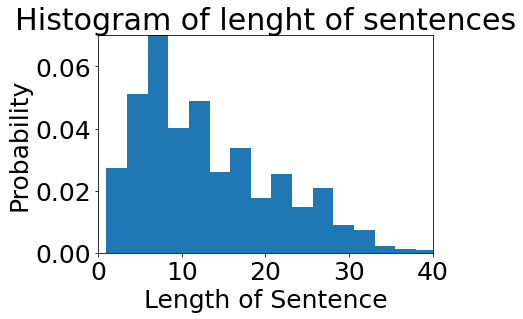

In [ ]:

print(lens_filtered_olid_train.describe())
# the histogram of the data
x, bins, p = plt.hist(lens_filtered_olid_train, bins = 30, density=True)


plt.xlabel('Length of Sentence')
plt.ylabel('Probability')
plt.title('Histogram of lenght of sentences')
#plt.text(60, .025, r'$\mu=100,\ \sigma=15$')
plt.xlim(0, 40)
plt.ylim(0, 0.07)
#plt.grid(True)
plt.show()

count    860.000000
mean      14.894186
std        7.811172
min        1.000000
25%        8.000000
50%       14.000000
75%       21.000000
max       41.000000
Name: text, dtype: float64


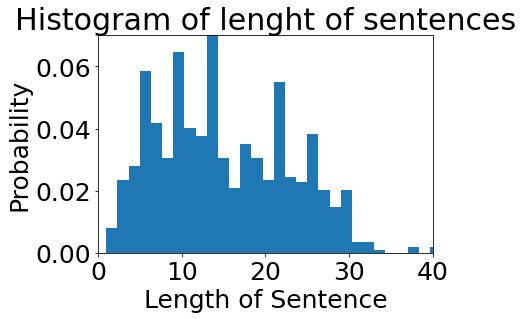

In [ ]:
print(lens_filtered_olid_test.describe())
x, bins, p = plt.hist(lens_filtered_olid_test,bins = 30,  density=True)


plt.xlabel('Length of Sentence')
plt.ylabel('Probability')
plt.title('Histogram of lenght of sentences')
#plt.text(60, .025, r'$\mu=100,\ \sigma=15$')
plt.xlim(0, 40)
plt.ylim(0, 0.07)
#plt.grid(True)
plt.show()

count    5852.000000
mean       15.100649
std         7.677882
min         1.000000
25%         9.000000
50%        14.000000
75%        21.000000
max        77.000000
Name: text, dtype: float64


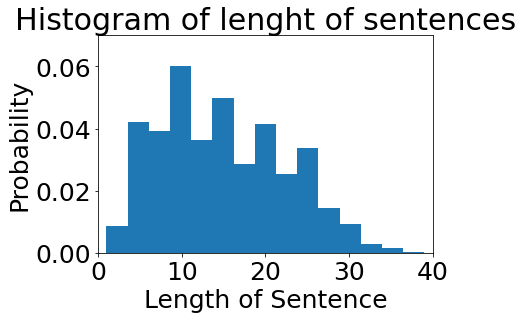

In [ ]:
print(lens_filtered_hasoc.describe())
x, bins, p = plt.hist(lens_filtered_hasoc,bins = 30,  density=True)


plt.xlabel('Length of Sentence')
plt.ylabel('Probability')
plt.title('Histogram of lenght of sentences')
#plt.text(60, .025, r'$\mu=100,\ \sigma=15$')
plt.xlim(0, 40)
plt.ylim(0, 0.07)
#plt.grid(True)
plt.show()

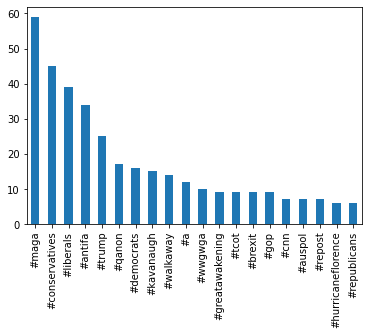

In [ ]:
filtered_olid_test.str.extractall(r'(\#\w+)')[0].value_counts().head(20).plot.bar()


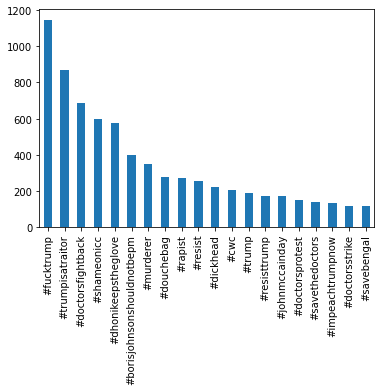

In [ ]:
filtered_hasoc.str.extractall(r'(\#\w+)')[0].value_counts().head(20).plot.bar()

In [ ]:
from nltk.corpus import stopwords
stop = set(stopwords.words("english"))
stop.add('@user')
stop.add('url')
stop.add('-')
corpus = [word for i in filtered_olid_test.str.split().values.tolist() for word in i if (word not in stop)]

In [ ]:
from nltk.probability import FreqDist
most_common_olid_test = FreqDist(corpus).most_common(20)

In [ ]:
most_common_olid_test

[('like', 64),
 ('control', 62),
 ('gun', 61),
 ('#maga', 56),
 ('get', 50),
 ('one', 48),
 ('us', 47),
 ('#conservatives', 45),
 ('people', 44),
 ('liberals', 42),
 ('antifa', 39),
 ('#liberals', 39),
 ('want', 37),
 ('love', 35),
 ('conservatives', 34),
 ('#antifa', 34),
 ('via', 34),
 ('know', 31),
 ('good', 31),
 ('new', 30)]

In [ ]:
import seaborn as sns

In [ ]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
words, frequency = [], []
for word, count in most_common_olid_test:
    words.append(word)
    frequency.append(count)
sns.set(font_scale = 2.5)
#sns.barplot(x = frequency, y = words).set(title='Frequency of words in OLID Test')
olte_words = words[:15]

In [ ]:
stop = set(stopwords.words("english"))
stop.add('@user')
stop.add('url')
stop.add('-')
corpus = [word for i in filtered_olid_train.str.split().values.tolist() for word in i if (word not in stop)]
most_common_olid_train = FreqDist(corpus).most_common(20)
sns.set(rc={'figure.figsize':(11.7,8.27)})
words, frequency = [], []
for word, count in most_common_olid_train:
    words.append(word)
    frequency.append(count)
sns.set(font_scale = 2.5)
#sns.barplot(x = frequency, y = words).set(title='Frequency of words in OLID Train')
oltr_words = words[:15]

In [ ]:
stop = set(stopwords.words("english"))
stop.add('@user')
stop.add('url')
stop.add('-')
corpus = [word for i in filtered_hasoc.str.split().values.tolist() for word in i if (word not in stop)]
most_common_hasoc = FreqDist(corpus).most_common(20)
sns.set(rc={'figure.figsize':(11.7,8.27)})
words, frequency = [], []
for word, count in most_common_hasoc:
    words.append(word)
    frequency.append(count)
sns.set(font_scale = 2.5)
#sns.barplot(x = frequency, y = words).set(title='Frequency of words in HASOC')
has_words = words[:15]

In [ ]:
olte_words
d = {'OLID TEST': olte_words, 'OLID TRAIN': oltr_words, 'HASOC': has_words}
df= pd.DataFrame(d)
df

,OLID TEST,OLID TRAIN,HASOC
0,like,gun,#fucktrump
1,control,liberals,#trumpisatraitor
2,gun,control,@realdonaldtrump
3,#maga,like,#doctorsfightback
4,get,antifa,#shameonicc
5,one,people,#dhonikeepstheglove
6,us,conservatives,@icc
7,#conservatives,#maga,trump
8,people,get,&amp;
9,liberals,know,doctors


In [ ]:
print(df.to_latex())

\begin{tabular}{llll}
\toprule
{} &       OLID TEST &     OLID TRAIN &                       HASOC \\
\midrule
0  &            like &            gun &                  \#fucktrump \\
1  &         control &       liberals &            \#trumpisatraitor \\
2  &             gun &        control &            @realdonaldtrump \\
3  &           \#maga &           like &           \#doctorsfightback \\
4  &             get &         antifa &                 \#shameonicc \\
5  &             one &         people &         \#dhonikeepstheglove \\
6  &              us &  conservatives &                        @icc \\
7  &  \#conservatives &          \#maga &                       trump \\
8  &          people &            get &                       \&amp; \\
9  &        liberals &           know &                     doctors \\
10 &          antifa &            one &  \#borisjohnsonshouldnotbepm \\
11 &       \#liberals &          \&amp; &                   \#murderer \\
12 &            want &  

In [ ]:
most_common_olid_test


[('like', 64),
 ('control', 62),
 ('gun', 61),
 ('#maga', 56),
 ('get', 50),
 ('one', 48),
 ('us', 47),
 ('#conservatives', 45),
 ('people', 44),
 ('liberals', 42),
 ('antifa', 39),
 ('#liberals', 39),
 ('want', 37),
 ('love', 35),
 ('conservatives', 34),
 ('#antifa', 34),
 ('via', 34),
 ('know', 31),
 ('good', 31),
 ('new', 30),
 ('going', 29),
 ('see', 29),
 ('need', 27),
 ('way', 25),
 ('never', 25),
 ('please', 25),
 ('im', 25),
 ('support', 24),
 ('#trump', 24),
 ('time', 24),
 ('shit', 24),
 ('always', 23),
 ('don’t', 23),
 ('still', 22),
 ('years', 21),
 ('really', 21),
 ('go', 21),
 ('think', 21),
 ('life', 20),
 ('even', 19)]

In [ ]:
a = {'like': [64, 508, 311],
 'control': [62, 542, 0],
 'gun': [61, 619, 0],
 '#maga': [56, 344, 0],
 'get': [50, 284, 249],
 'one': [48, 271, 240],
 'us': [47, 206, 202],
 'people': [44, 410, 331],
 'liberals': [42, 588,0],
 'antifa': [39, 434, 0],
 'want': [37, 159, 0],
 'love': [35, 145, 0],
 'conservatives': [34, 377, 0],
 'know': [31, 279, 189],
 'good': [31, 210, 0],
 'going': [29, 170, 0],
 'see': [29, 161, 176],
 'need': [27, 166, 0],
 'way': [25, 138, 0],
 'never': [25, 165, 0],
 'im': [25, 137, 0],
 '#trump / trump': [24, 244, 181+450],
 'time': [24, 168, 217],
 'shit': [24, 175, 0],
 'don’t': [23, 152, 0],
 'still': [22, 135 , 0],
 'even': [19, 158, 178],
 '&amp;': [0, 267, 407],
 'would': [0, 256, 211],
 }


df = pd.DataFrame.from_dict(a, orient='index')
df.columns= ['OLID_TEST', 'OLID_TRAIN', "HASOC"]
df

,OLID_TEST,OLID_TRAIN,HASOC
like,64,508,311
control,62,542,0
gun,61,619,0
#maga,56,344,0
get,50,284,249
one,48,271,240
us,47,206,202
people,44,410,331
liberals,42,588,0
antifa,39,434,0


In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
# Initialize CountVectorizer
stop = set(stopwords.words("english"))
stop.add('@user')
stop.add('url')
stop.add('-')
stop.add('user user')
vec = CountVectorizer(stop_words = stop, ngram_range = (2, 2))
# Matrix of ngrams
bow = vec.fit_transform(filtered_olid_train)
# Count frequency of ngrams
count_values = bow.toarray().sum(axis=0)
# Create DataFrame from ngram frequencies
ngram_freq = pd.DataFrame(sorted([(count_values[i], k) for k, i in vec.vocabulary_.items()], reverse = True))
ngram_freq.columns = ["frequency", "ngram"]
ngram_freq.head(20)


/usr/local/lib/python3.7/dist-packages/sklearn/feature_extraction/text.py:401: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['user'] not in stop_words.
  % sorted(inconsistent)


,frequency,ngram
0,8458,user user
1,513,gun control
2,93,user liberals
3,60,user think
4,54,user yes
5,52,user antifa
6,51,user know
7,51,control laws
8,48,user oh
9,48,user conservatives


In [ ]:
sns.barplot(x = frequency, y = words).set(title='Frequency of words in HASOC')

In [ ]:
olid_train

In [ ]:
olid_test

In [ ]:

nh = 0
for ele in hasoc['labels']:
  if ele == 0:
    nh+=1
print(nh)

h = 0
for ele in hasoc['labels']:
  if ele == 1:
    h+=1
print(h)


In [ ]:
 2261/5852 *100

In [ ]:

nh = 0
for ele in olid_test['labels']:
  if ele == 0:
    nh+=1
print(nh)

h = 0
for ele in olid_test['labels']:
  if ele == 1:
    h+=1
print(h)

240/860 *100



In [ ]:

nh = 0
for ele in olid_train['labels']:
  if ele == 0:
    nh+=1
print(nh)

h = 0
for ele in olid_train['labels']:
  if ele == 1:
    h+=1
print(h)
